<h2>ALY6140_Summer_2021_Pragati_Koladiya_Capstone_Project</h2>
<p> <b>Tittle:</b> Capstone Project</p>
<p><b>Course:</b> ALY6140 Analytics Systems Technology</p>
<p><b>Written By:</b> Pragati Koladiya</p>
Copyright (c) 2021

<h2><b>Introduction</b></h2> 

The new Covid episode has seen a tremendous measure of individuals who signed up for the stimulus checks of 1200 USD in America in the wake of losing their jobs. One of the necessities for the beneficiaries is to have their yearly earnings under $75,000, which is all available through their yearly assessment report.

Understanding the likely yearly pay of unfiled taxes people can assist to help the government with making key strides in dealing with them and guaranteeing the size of their bank hold. Consequently, the government would profit immensely from an Machine Learning model that can assist with anticipating a person's pay base on their demographic features.

According to the Inflationcalcualtor.com, 50,000USD in 1994 equals to $87,000 in 2019. So by using the UCI data I would like to built the modle and provide the best perorming model. In future, this model can be used to apply for the current year’s dataset.


---


<h2><b>Dataset Information</b></h2>
<p>The dataset is donated by Ron Koshavi and Barry Becker after they published their findings in “Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid” (Kohavi, 1996).</p>

<p>The data contains <b>32k observations and 13 attributes </b> or variables related to the changed census.</p>


<p><i><b>Data Source:</b></i> UCI Machine Learning Repository</p>

 [Link to Data Source](https://archive.ics.uci.edu/ml/datasets/census+income)

<p><i><b>Reserch Question:</b> Prediction task is to determine whether a person makes over 50K a year.</i></p> 



---


<h2><b>Data Exploration</b></h2>
<ul>
  <li>Checking null values</li>
  <li>Observing datatypes and unique values</li>
  <li>Identify independent and dependent varables</li>
</ul>


---


<h2><b>Exploratory Data Analysis (EDA)</b></h2>

<p>Exploratory data analysis is a very important step to get an idea of what the dataset is like and what kind of modifications we need to make.
</p>


---


<h2><b>Preprocessing</b></h2>
<ul>
    <li>Checking missing values</li>
    <li>Dropping columns</li>
    <li>Data Normalization</li>
    <li>One Hot Encoding</li>
    <li>Final arrangements before model comparison</li>
</ul>


---


<h2><b>Models Implemented</b></h2>
<ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>Decision Tree</li>
    <li>KNN Classifier</li>
    <li>KNN with optimum k value</li>
</ul>


---


<h2><b>Model Comparision</b></h2>

<p>Select the best model based on the performance</p>

---


<h2><b>Testing Model</b></h2>
<ul>
  <li>Using excel dummy data</li>
    <ul>
      <li>Dummy data is generated using excel</li>
      <li>Predicted individual income above or below 50k using the best accuracy model</li>
    </ul>
    <li>Overall Observation</li>
  </ul>
</ul>


---


<h2><b>Conclusion</b></h2>
<h2><b>References & links</b></h2>

# Packages & Libraries

<h2>Importing Libraries and Modules</h2>

In [1]:
!pip install category_encoders

In [2]:
import category_encoders as ce

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import numpy as np

import os

import pandas as pd
import random

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,make_scorer,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#Display settings for notebook
pd.set_option('display.max_rows', 50000000)
pd.set_option('display.max_colwidth',10000000)
pd.set_option('display.max_columns', 50000000)
pd.set_option('display.width', 100000000)

# Data Extraction

<h2>Reading the data</h2>

- Data is loaded from the csv file which is published to web so that we do not need to download the file to execute further analysis.

In [3]:
Data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRufeNYNpNIZIS8iy8ssDFD7EzQvx4u-AyrX2-0qDftWuqlA3nt63FekIwMU_EZK9rbzS0_38fZcuht/pub?gid=1641484596&single=true&output=csv"
original_data = pd.read_csv(Data_path)
original_data.shape

(32561, 15)

In [4]:
#Viewing head of the dataset
original_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
#Viewing tail of the dataset
original_data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<h2>Dataset Information</h2>
<p> 
  <i> 
  </i>
</p>
<ol style="list-style-type:squre;">
     <li><b>age</b> - Age</li>
     <li><b>workclass</b> - Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)</li>
     <li><b>education_level</b> - Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
</li>
     <li><b>education-num</b> - Number of educational years completed</li>
     <li><b>marital-status</b> - Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)</li>
     <li><b>occupation</b> - Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)</li>
     <li><b>relationship</b>- Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
</li>
     <li><b>race</b> - Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)</li>
     <li><b>sex</b> - Sex (Female, Male)</li>
     <li><b>capital-gain</b> - Monetary Capital Losses
</li>
     <li><b>capital-loss</b> - Monetary Capital Losses
</li>
     <li><b>hours-per-week</b> - Average Hours Per Week Worked
    </li>
<li><b>native-country</b> - Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)</li>
</ol>



# Data Exploration

In [6]:
#Coping original dataset to new dataframe called 'df'
df = original_data.copy()

In [7]:
#checking datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

- The describe() takes into account the measures of central tendecies to give an in depth numeric idea of all the attributes of the dataset.

In [8]:
#let's look at the summary of the dataset
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Using isnull().sum() function we extract the count of total number of null entries in each attribute.

In [9]:
#checking null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

=> After executing the above function we get to know that none of the attributes comprise of any null entries.

# Data Cleanup

- Rename the attributes so as to remove the blank space between them

In [10]:
#Renaming columns to replace dot with underscore
#mainly 6 columns were renamed
df = df.rename(columns={'education.num':'education_num','marital.status': 'marital_status', 'capital.gain': 'capital_gain', 'capital.loss':'capital_loss','hours.per.week':'hours_per_week','native.country':'native_country'})



In [11]:
#listing the columns with updated names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'], dtype='object')

- The count() function is use to display the total values stored in each column.

In [12]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education_num     32561
marital_status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital_gain      32561
capital_loss      32561
hours_per_week    32561
native_country    32561
income            32561
dtype: int64

=> Each column has equal value count

- Drop the column which does not have clear meaning

In [13]:
df=df.drop(columns=['fnlwgt'])

- Removing rows with special charater as values

In [14]:
# Printing the count of ? in each columns 
print(df[df["workclass"]=='?']["workclass"].sum())
print(df[df["relationship"]=='?']["relationship"].sum())
print(df[df["occupation"]=='?']["occupation"].sum())
print(df[df["native_country"]=='?']["native_country"].sum())

????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

In [15]:
# Droping the row where the column contains '?' special character

df.drop(df.loc[df['workclass']=='?'].index, inplace=True)
df.drop(df.loc[df['relationship']=='?'].index, inplace=True)
df.drop(df.loc[df['occupation']=='?'].index, inplace=True)
df.drop(df.loc[df['native_country']=='?'].index, inplace=True)

In [16]:
print(df[df["workclass"]=='?']["workclass"].sum())
print(df[df["relationship"]=='?']["relationship"].sum())
print(df[df["occupation"]=='?']["occupation"].sum())
print(df[df["native_country"]=='?']["native_country"].sum())

0
0
0
0


- Data left after droping unwanted rows

In [17]:
df.shape

(30162, 14)

# Data Visulization

<h2>Exploratory Data Analysis (EDA)</h2>

- This section will include looking at the data analytically. 
- Exploratory data analysis will be performed to see how the data variables look like and how income relates to the other variables individually.

<h2>Heatmap to show correlation between attributes</h2>

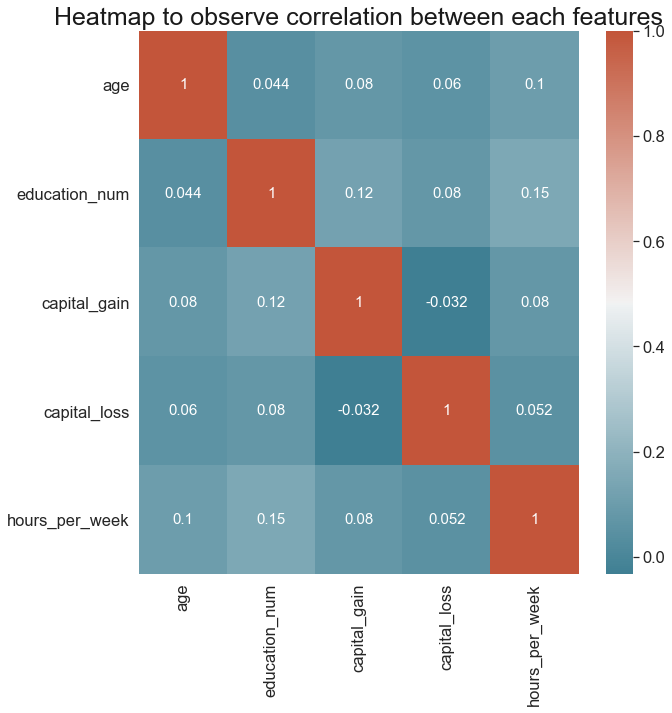

In [18]:
#Correlations of each features of dataset
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)

#heat map
ax=sns.heatmap(df.corr(),cmap=sns.diverging_palette(220, 20, as_cmap=True),annot=True, annot_kws={"size":15})

#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Heatmap to observe correlation between each features',fontsize=25, color ='k')
plt.show()

=> It can be observed that Some of the features are strongly correlated with income while some of them aren't.



- Using *corr()* function we can observe the exact correlation value with each column.
- Using *sort_values()* function we can sort those values in ascending or descending order bypassing the parameter ascending values as True or False

=> From the above output, it can be inferred that the attribute's  education_num,capital_gain, hours_per_week, and age have a maximum correlation with 'income' attribute.


In [19]:
#Total number of records
nrecords = df.shape[0]

#Number of records where individual's income is more than $50,000
ngreater_50k = df[df['income'] == '>50K'].shape[0]

#Number of records where individual's income is at most(less than or equal to) $50,000
natmost_50k = df[df['income'] == '<=50K'].shape[0]

#Percentage of individuals whose income is more than $50,000
greater_percent =  round(((ngreater_50k /  nrecords) * 100),3)

#Print the results
print("Total number of records: {}".format(nrecords))
print("Individuals making more than $50,000: {}".format(ngreater_50k))
print("Individuals making at most $50,000: {}".format(natmost_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))


Total number of records: 30162
Individuals making more than $50,000: 7508
Individuals making at most $50,000: 22654
Percentage of individuals making more than $50,000: 24.892%


<h2>Age Density Plot</h2>

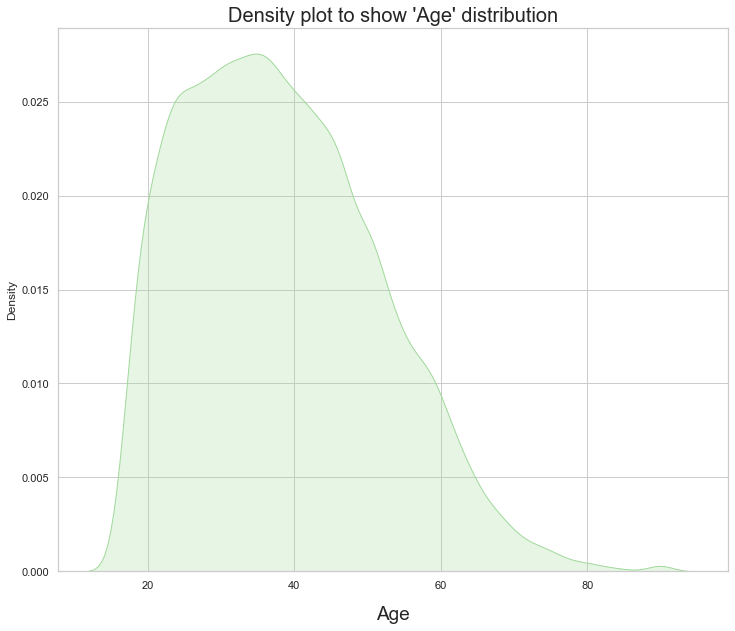

In [20]:
#kdeplot to visualize the distribution of 'age'
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')

#kdeplot - Kernel Density Estimates
sns.kdeplot(df['age'], shade=True, color="#a1d99b")

plt.xlabel("Age", labelpad = 15, fontsize=19)
plt.title("Density plot to show 'Age' distribution", fontsize=20)
plt.show()


=> As we can observe the age distribution is right skewed. Most number of people are between age 20 and 40. Above age 40 people are less in the provided dataset.

<h2>Educational Years Completed Count Plot</h2>



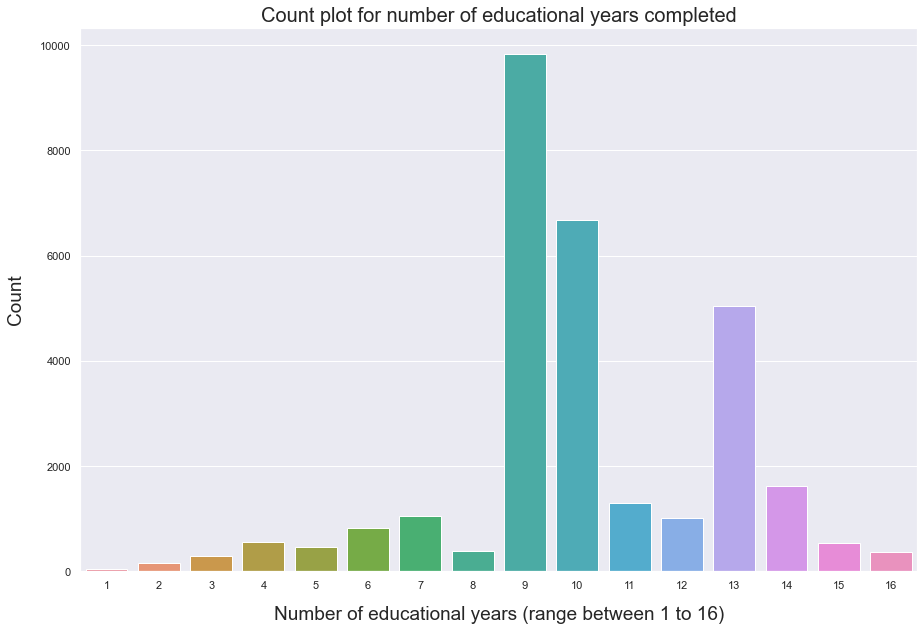

In [21]:
#Count plot to show the education_num count
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.set(palette='Reds')
ax = sns.countplot(df['education_num'])

plt.title("Count plot for number of educational years completed", fontsize=20)
plt.xlabel("Number of educational years (range between 1 to 16)", labelpad = 15, fontsize=19)
plt.ylabel("Count", labelpad = 15, fontsize=19);
plt.show()

<p>=> Maximum number of educational year counts are dense around 9, 10 and 11 while education year count 1,2,3,15 and 16 are very less.</p>


<h2>Income Vs Age</h2>


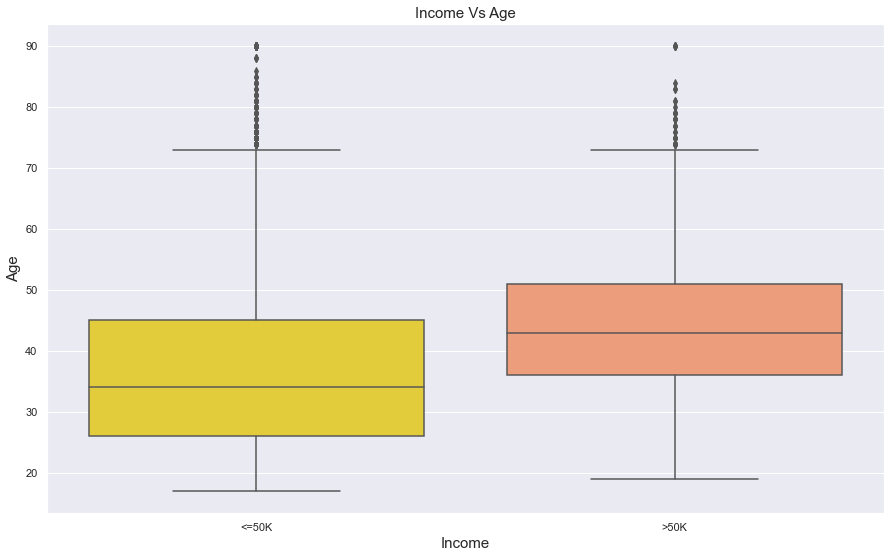

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,9))
sns.set(style='whitegrid')
sns.set(palette='gnuplot2_r')

ax = sns.boxplot(x="income", y="age", data=df)

plt.title('Income Vs Age',fontsize=15)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

=> The above boxplot shows that people having less than 50K income are average age of 35 and minimum age of 25 and maximum age of 45.

=> For the people having income above 50K were average age around 45 with youngest around age of 35 and oldest around 52 years. 

=> Over all we can observe that lower the age lesser the salary is. Most of the people for this data set falls under category of income less then 50K.

<h2>Income Count Plot</h2>

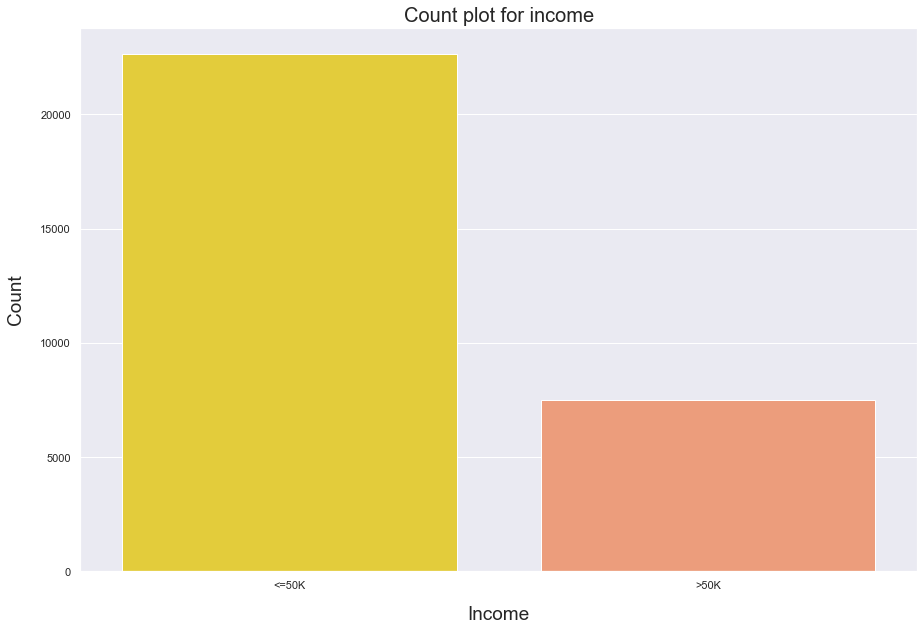

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.set(palette='gnuplot2_r')
ax = sns.countplot(df['income'])

plt.title("Count plot for income", fontsize=20)
plt.xlabel("Income", labelpad = 15, fontsize=19)
plt.ylabel("Count", labelpad = 15, fontsize=19);
plt.show()

<p>=> There are around 25K people comes under income less than or equal to 50K whereas only 7K people are earning money above 50K during 90's</p>

<h2>Income Vs Educational_num</h2>

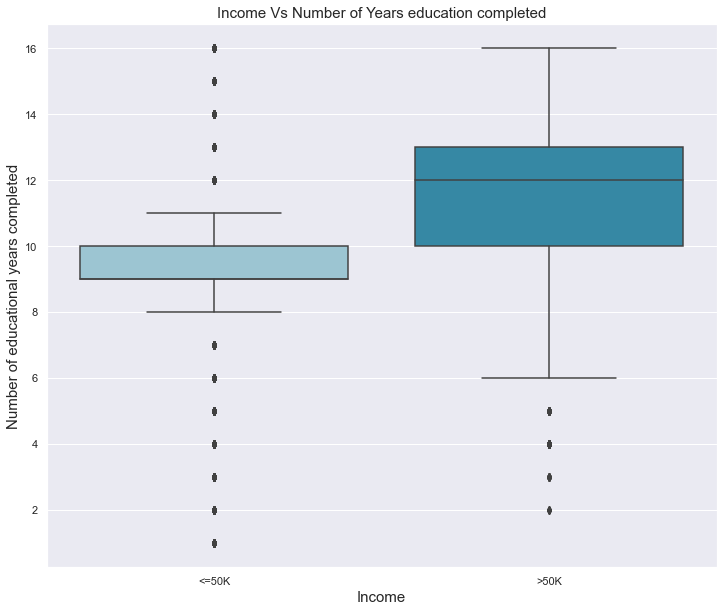

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='ocean_r')

ax = sns.boxplot(x="income", y="education_num", data=df)

plt.title('Income Vs Number of Years education completed',fontsize=15)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Number of educational years completed', fontsize=15)
plt.show()

=> People with income less than or equal to  50K are having number of educational year at most 10 years where as people with good education (more educational year) having income above 50K.


<h2>Education Count Plot  </h2>

- Preparing data to plot 

In [25]:
df['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

- Arranging data by sequence from lowest to highest

In [26]:
df_sorted_edu = pd.Categorical(df['education'], 
                      categories=["Preschool","1st-4th","5th-6th","7th-8th","9th","10th","11th","12th","HS-grad","Prof-school","Some-college","Bachelors","Masters","Assoc-acdm","Assoc-voc","Doctorate"],
                      ordered=True)


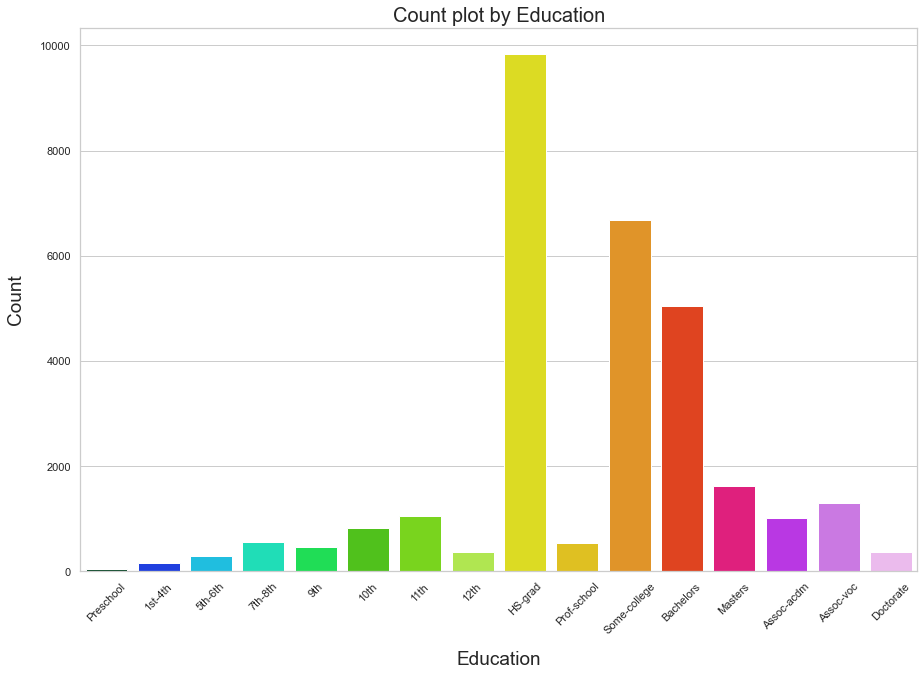

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.color_palette(as_cmap=True)
ax = sns.countplot(df_sorted_edu, palette = "gist_ncar")

plt.title("Count plot by Education", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("Education", labelpad = 15, fontsize=19)
plt.ylabel("Count", labelpad = 15, fontsize=19);
plt.show()

=> The above bar garph shows the education people have attended upto. 
=> As we can observe that highest number of people have completed their high school. The second highest (aprox 6500 people) education completed is in some college. The third highest bar shows around 4500 people have completed their bachelors. 
=> People with masterss are very less during 90's.

=> Over all, we can see there are many people who are working and have comepleted their high school. 

<h2>Workclass Count Plot  </h2>

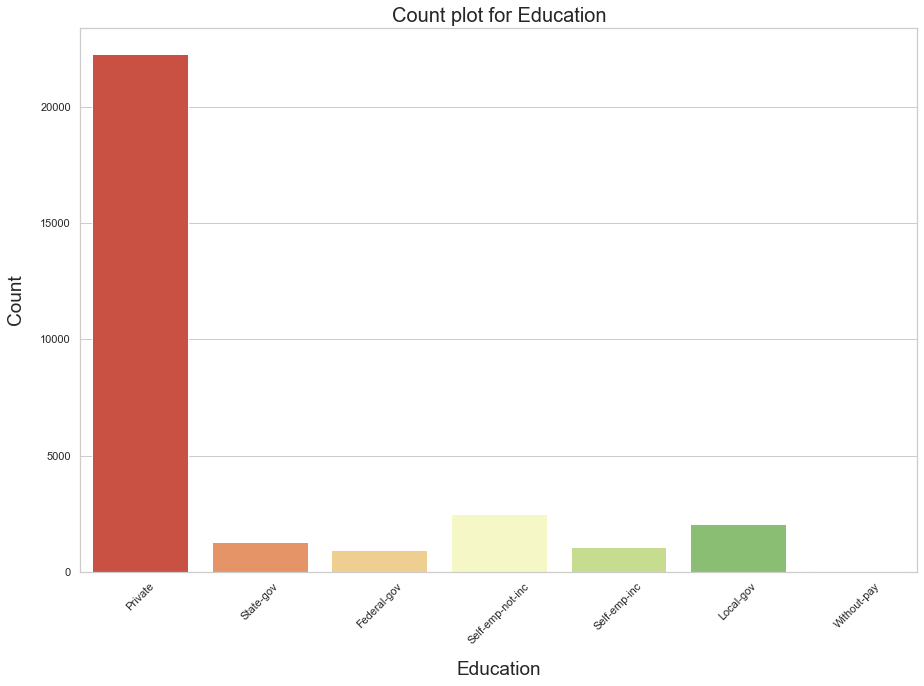

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
ax = sns.countplot(df['workclass'], palette = "RdYlGn")

plt.title("Count plot for Education", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("Education", labelpad = 15, fontsize=19)
plt.ylabel("Count", labelpad = 15, fontsize=19);
plt.show()


=> Around 25k people are working in private sector and very less number of people are working for fedral goverment and state goverment.

=> The count of people working for local goverment and self employed are almost similar in count.

=> This dataset does not have anybody who is working and not getting paid.


<h2>Relationship Count Plot</h2>

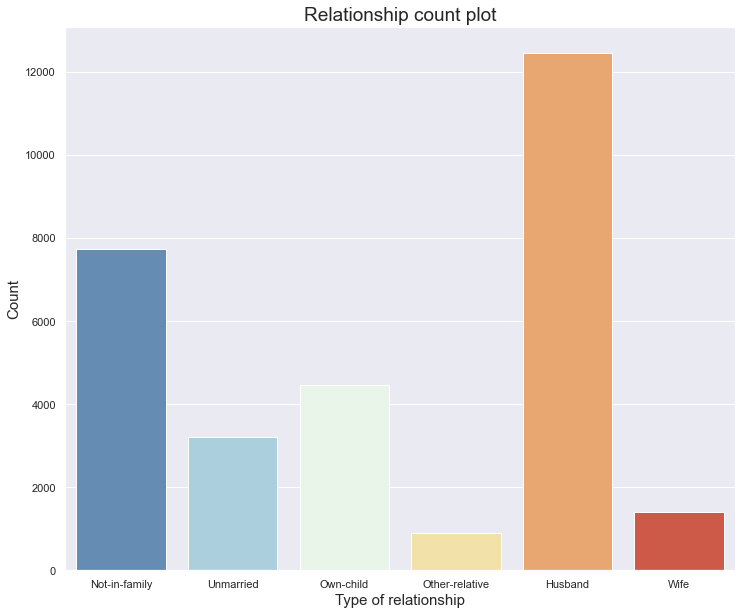

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='RdYlBu_r')

ax = sns.countplot(x="relationship", data=df)

plt.title('Relationship count plot',fontsize=19)
plt.xlabel('Type of relationship', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

=> For the given data set most of the employes who are working are husbands and less than 8K people are not in family relationship. 

=> During 90's we can see very less number of people were working who's relationship is wife or other relative.

=> Third highest relationship category is own child.

=> Over all, we can observe mainly husbands were working and then not in family and one child people are working at max in the industries.


<h2>Race Count Plot</h2>

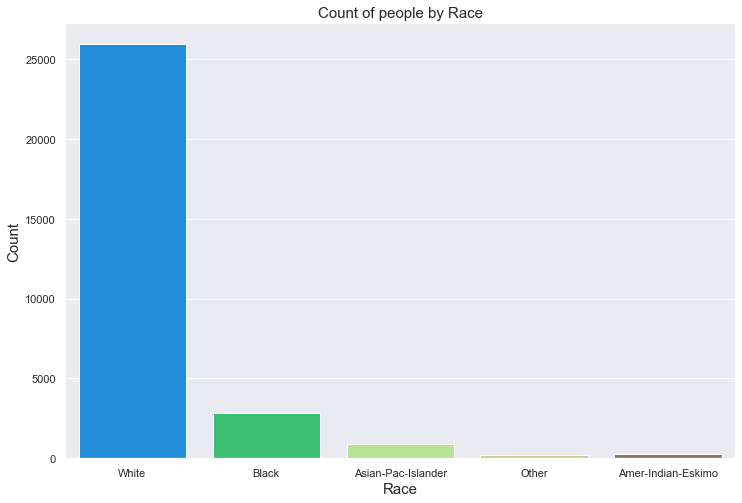

In [30]:
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
sns.set(palette='terrain')

sns.countplot(df['race'])

plt.title('Count of people by Race',fontsize=15)
plt.xlabel('Race', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

<p>=> As the data set is about united states most of the people are working from white community and second highest are from balck community whereas other race people are very less.</p>



<h2>Income Count by Race </h2>

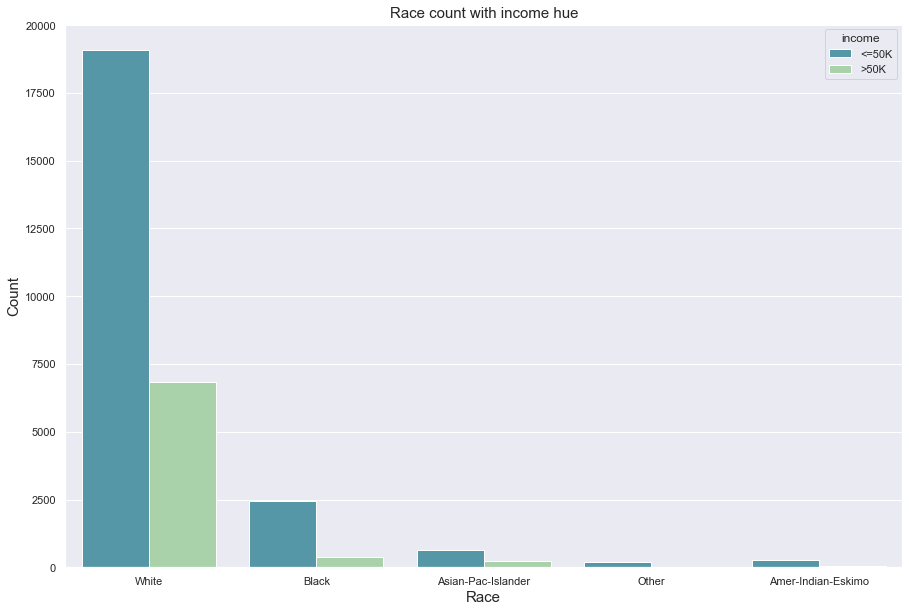

In [31]:
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.set(palette='Spectral_r')

sns.countplot(x="race", data = df, hue = 'income')

plt.title('Race count with income hue',fontsize=15)
plt.xlabel('Race', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()


=> Around 18K white people are earning salary less than or equal to 50k and only 7K white people are earning salary above 50K which is the highest among all the race.
=> On the other hand, around 2500 plack people are earning <=50k salary and very minor number of people are earning salary above 50k.

<h2>Gender count by occupation</h2>

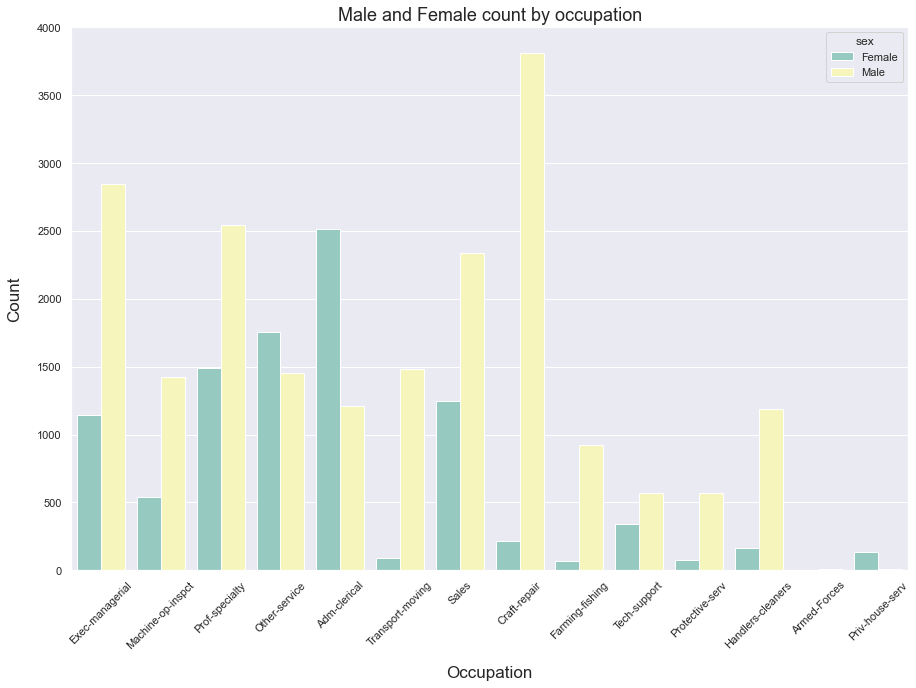

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.set(palette='Set3')

sns.countplot(x = 'occupation', data = df, hue = 'sex')
plt.title("Male and Female count by occupation", fontsize=18)
plt.xlabel("Occupation", labelpad = 15, fontsize=17)
plt.xticks(rotation=45)
plt.ylabel("Count", labelpad = 15, fontsize=17);
plt.show()

=> Above count plot shows that highest number of male are working in the carft-repair where as only 300 womens are working in that field.

=> The maximum number of womens are working in adm-clerical. 

=> Over all mens are more in all the field except adm-clerical.

<h2>Gender count by marital status</h2>

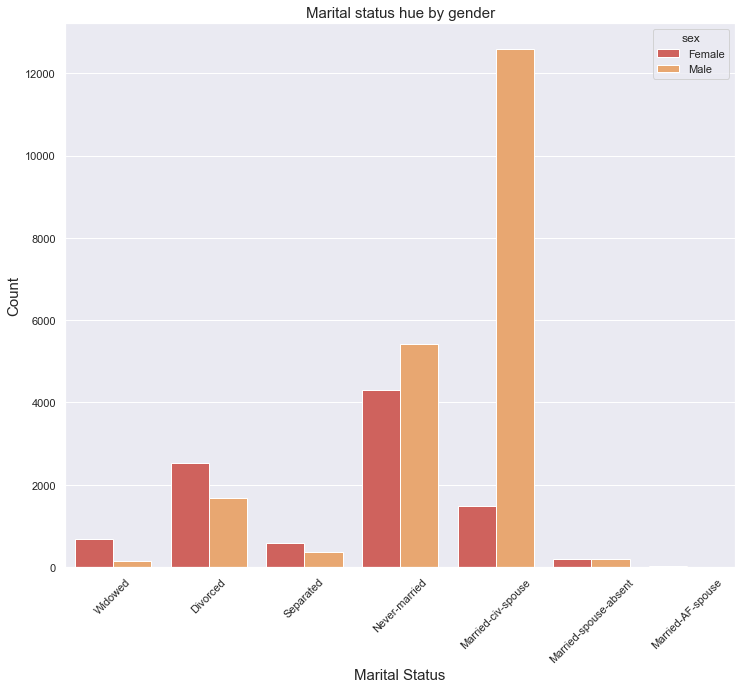

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.set(style='whitegrid')
sns.set(palette='Spectral')

ax = sns.countplot(x="marital_status", data=df, hue = 'sex')

plt.title('Marital status hue by gender',fontsize=15)
plt.xticks(rotation=45)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

=> Male with mariteal status as meddied-civ-spouce count is at top.

=> On the flip side the cound of male and female working class and never married are almost similar in count.

=> For mariteal status divorced category, the highest count is from female but male count is also not too far. 

<h2>Capital Gain Histogram</h2>

([<matplotlib.axis.YTick at 0x7fdb1bf0c970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

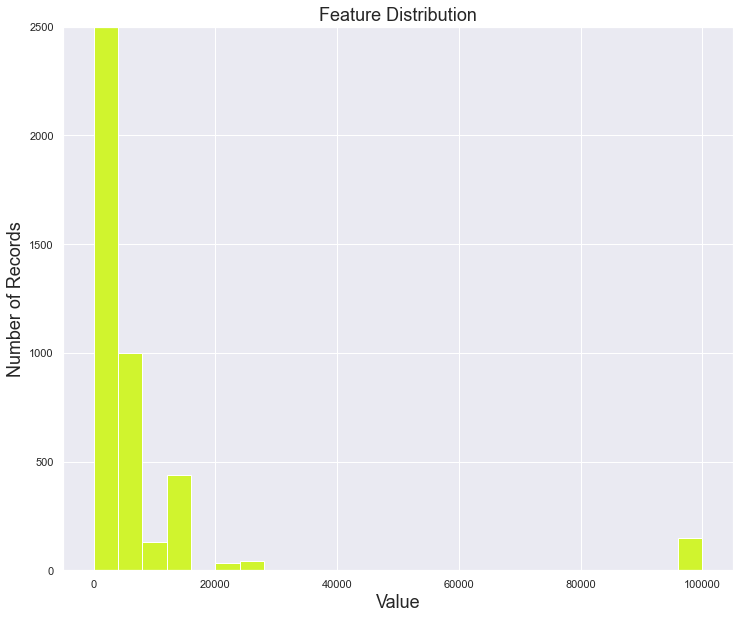

In [34]:
plt.figure(figsize = (12,10))
plt.hist(df['capital_gain'], bins = 25, color = '#D0F42E')
plt.title("Feature Distribution", fontsize = 18)
plt.xlabel("Value",fontsize = 18)
plt.ylabel("Number of Records", fontsize = 18)
plt.ylim((0, 2500))
plt.yticks([0, 500, 1000, 1500, 2000, 2500])

=> Data for capital gain is not equally distributed. It is right skewed so we will take some action in future.

<h2>Capital Loss Histogram</h2>

([<matplotlib.axis.YTick at 0x7fdae80216a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

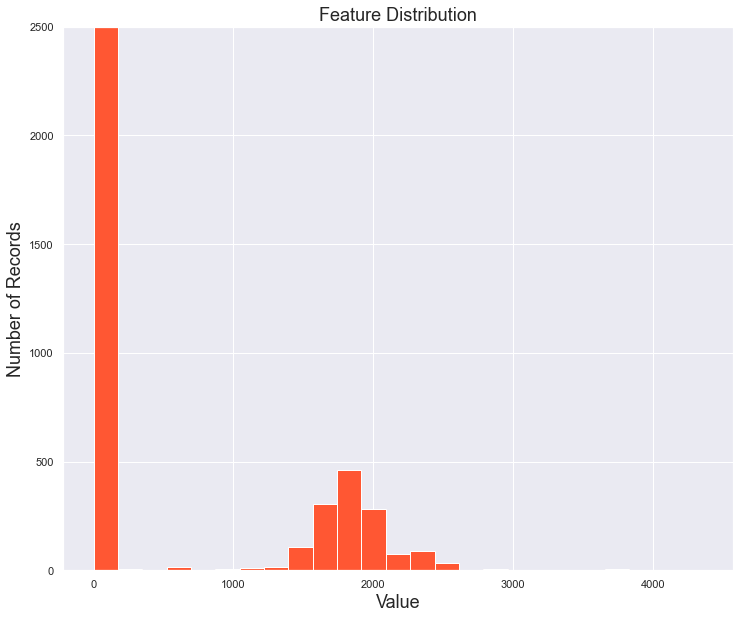

In [35]:
plt.figure(figsize = (12,10))
plt.hist(df['capital_loss'], bins = 25, color = '#FF5733')
plt.title("Feature Distribution", fontsize = 18)
plt.xlabel("Value",fontsize = 18)
plt.ylabel("Number of Records", fontsize = 18)
plt.ylim((0, 2500))
plt.yticks([0, 500, 1000, 1500, 2000, 2500])

=> Data for capital lost is sligthly right skewed so we will take some action in future.

<h2>Pair plot to show the correlation with all attribute</h2>

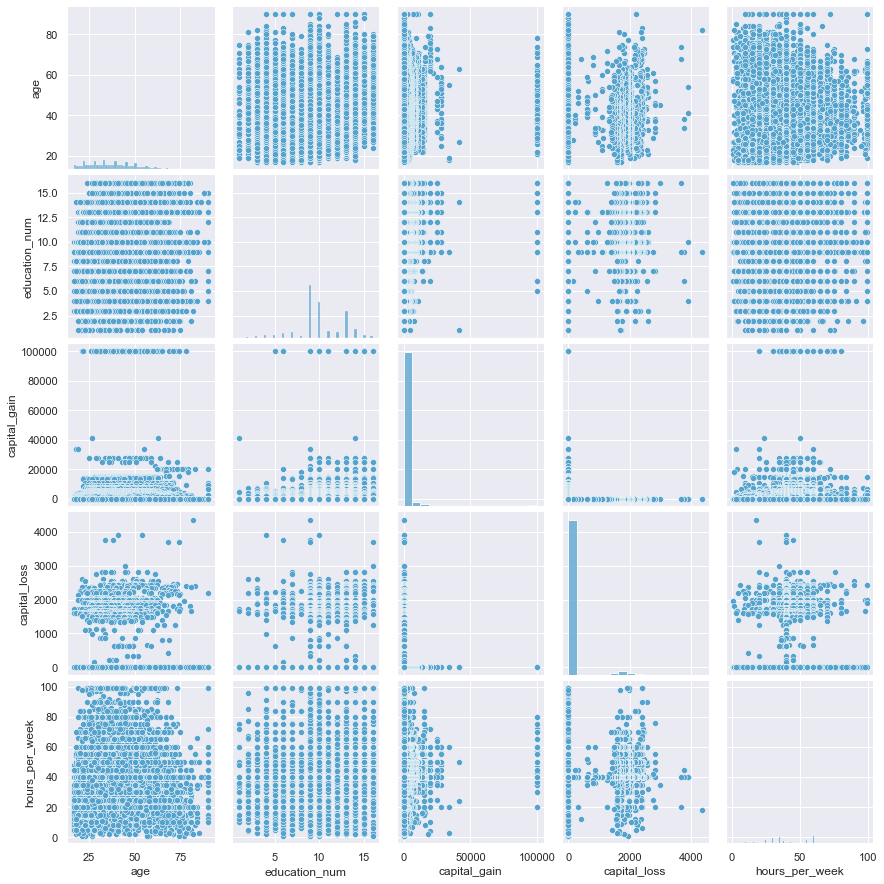

In [36]:
sns.set_style('whitegrid')
sns.set(style='whitegrid')
sns.set(palette='icefire')
sns.pairplot(df)
plt.show()

=> From above pairplor, it is apparent that the data has many outlers in almost all the columns.

- Before moving further, let's remove the skewness from the 'capital_gain' and 'capital_loss'.


# Data Prepration for Modeling

In [37]:
# Split the data into features and target variable
Features = df.drop('income', axis = 1)
#fresh_income is out target variable
fresh_income = df['income']

- Log transformation to remove skeweness of the data

In [38]:
#log transform
skewed = ['capital_gain', 'capital_loss']
log_transformed= pd.DataFrame(data=Features)

In [39]:
log_transformed[skewed]= Features[skewed].apply(lambda x: np.log(x+1))

- Plot histogram to view the data distribution after doing log transformation.

([<matplotlib.axis.YTick at 0x7fdb2857bca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

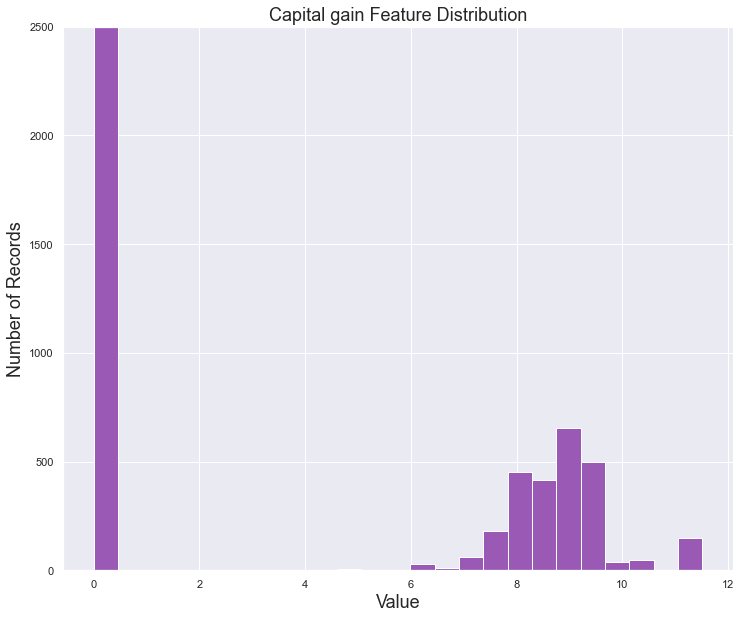

In [40]:
plt.figure(figsize = (12,10))
plt.hist(log_transformed['capital_gain'], bins = 25, color = '#9B59B6')
plt.title("Capital gain Feature Distribution", fontsize = 18)
plt.xlabel("Value",fontsize = 18)
plt.ylabel("Number of Records", fontsize = 18)
plt.ylim((0, 2500))
plt.yticks([0, 500, 1000, 1500, 2000, 2500])

([<matplotlib.axis.YTick at 0x7fdb1ca04340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

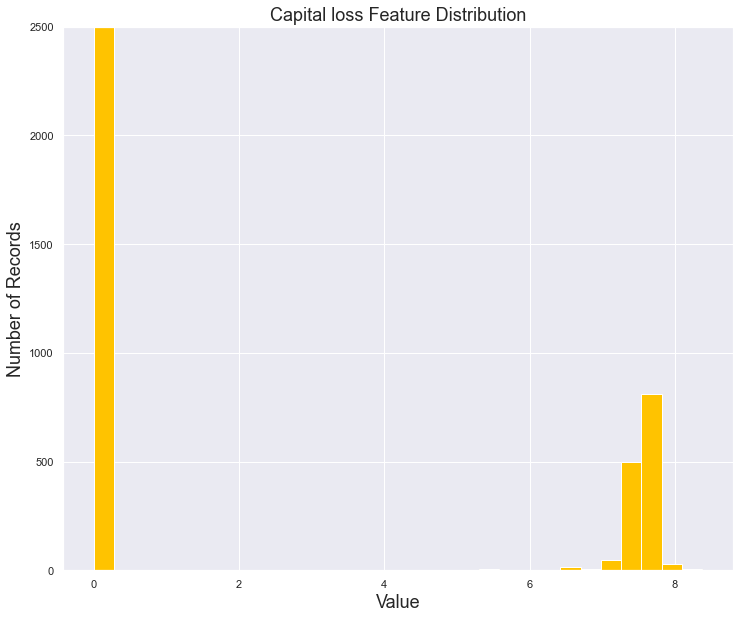

In [41]:
plt.figure(figsize = (12,10))
plt.hist(log_transformed['capital_loss'], bins = 30, color = '#FFC300')
plt.title("Capital loss Feature Distribution", fontsize = 18)
plt.xlabel("Value",fontsize = 18)
plt.ylabel("Number of Records", fontsize = 18)
plt.ylim((0, 2500))
plt.yticks([0, 500, 1000, 1500, 2000, 2500])

- Data view after doing log transform

In [42]:
log_transformed.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,8.379539,18,United-States
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,8.268988,40,United-States
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0.0,8.268988,40,United-States
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0.0,8.235095,45,United-States
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0.0,8.235095,40,United-States


# Data Normalization

- From the pair plot we had observed that the 'age','education_num','capital_gain','capital_loss', and 'hours_per_week' needs to be normalized as there are many outliers in the data.

- To normalize the data we will use the standardScaller() to standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 

In [43]:
#initialize a scaler, then apply it to the features
scaler =StandardScaler()           
numeric_convert= ['age','education_num','capital_gain','capital_loss','hours_per_week']

log_normaliz_transform = pd.DataFrame(data = log_transformed)
log_normaliz_transform[numeric_convert] = scaler.fit_transform(log_transformed[numeric_convert])

#Show an example of a record with scalling applied 
display(log_normaliz_transform.head(n=3))

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
1,3.316630,Private,HS-grad,-0.439738,Widowed,Exec-managerial,Not-in-family,White,Female,-0.301013,5.030969,-1.914161,United-States
3,1.184831,Private,7th-8th,-2.400559,Divorced,Machine-op-inspct,Unmarried,White,Female,-0.301013,4.961657,-0.077734,United-States
4,0.195067,Private,Some-college,-0.047574,Separated,Prof-specialty,Own-child,White,Female,-0.301013,4.961657,-0.077734,United-States


- Pair plot to view the distribution of data after performing normalization

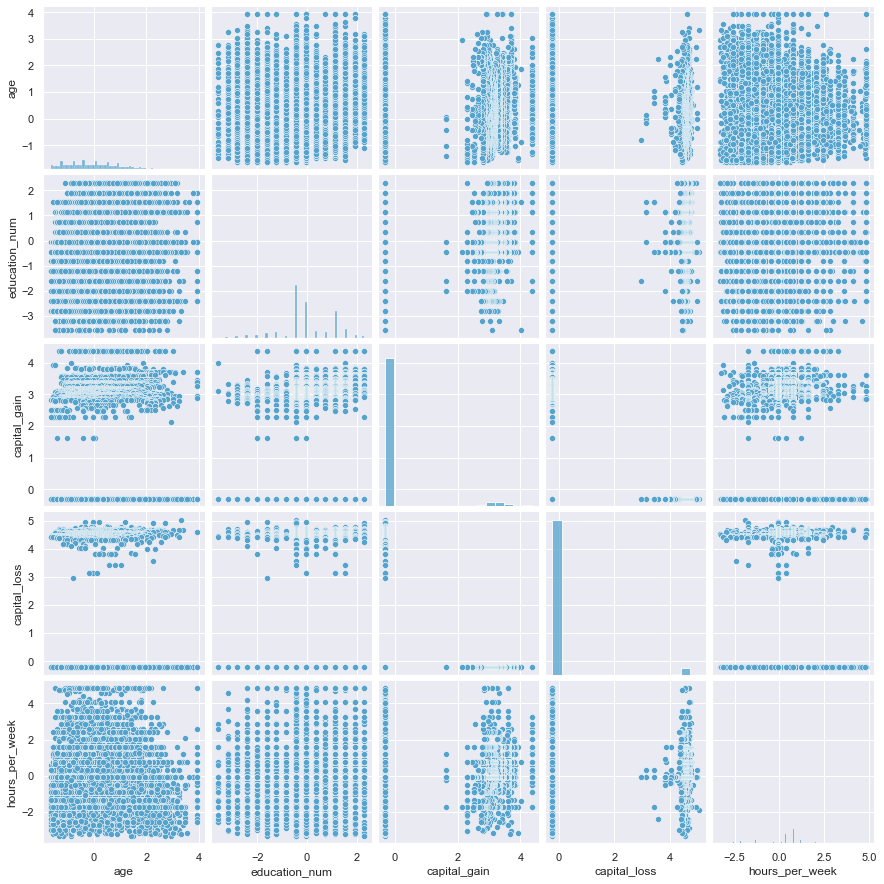

In [44]:
sns.set_style('whitegrid')
sns.set(style='whitegrid')
sns.set(palette='icefire')
sns.pairplot(log_normaliz_transform)
plt.show()

# One Hot encoding

In [45]:
fresh_income.head(4)

1    <=50K
3    <=50K
4    <=50K
5    <=50K
Name: income, dtype: object

In [46]:
#One-hot encode the 'log_normaliz_transform' data to get 
#   rid of categorical columns
final_df = pd.get_dummies(log_normaliz_transform)
"""
#coping original data into income varaible
income = fresh_income.copy()
#Encode the 'fresh_income' data to numerical values
encode_income= ce.OrdinalEncoder(cols=['income'],return_df=True, mapping=[{'col':'income', 'mapping':{' <=50K':0,' >50K':1}}])
#load the encoded income data into income variable
income = encode_income.fit_transform(income)
"""
# Get number of features after one-hot encoding
encoded_df = list(final_df.columns)
print("{} total features after one-hot encoding.".format(len(encoded_df)))

print (encoded_df)

103 total features after one-hot encoding.
['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing',

In [47]:
#coping data from original dataframe
income = fresh_income.copy()
#appanding income column to the final dataframe
final_df['income'] = income
#encoding of categorical data using replace() function
income = {'income': {'<=50K':0,'>50K':1}}
final_df.replace(income, inplace=True)

In [48]:
final_df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
1,3.316630,-0.439738,-0.301013,5.030969,-1.914161,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.184831,-2.400559,-0.301013,4.961657,-0.077734,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.195067,-0.047574,-0.301013,4.961657,-0.077734,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,-0.337883,-0.439738,-0.301013,4.940408,0.339636,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,-0.033340,-1.616231,-0.301013,4.940408,-0.077734,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Building the predictive model

- Split data 

In [49]:
#seprating out the features
X = final_df.drop(columns=["income"]).copy()
#seprating out the target
y = final_df["income"].copy()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Data Modeling

<h2>Logistic Regression</h2>

- Instantiate the Logistic Regression model using default and use fit() function to train model.

In [51]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

- We have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

In [52]:
y_pred_LR = LR.predict( X_test )

- **Model Evaluation**

In [53]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_LR)))

Accuracy Score: 0.8377258412066965


In [54]:
#Cross validation score
cv_score = cross_val_score(LR,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8354025234226548


In [55]:
#Mean score of Cross Validation
cv_score_LR = cross_val_score(LR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_score_LR.mean())

Mean Score of CV:  0.8156984459089225


In [56]:
#classification report with precision, recall and f1-score
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4529
           1       0.72      0.58      0.64      1504

    accuracy                           0.84      6033
   macro avg       0.79      0.75      0.77      6033
weighted avg       0.83      0.84      0.83      6033



In [57]:
#let us compute the confusion matrix taking parameters test data -
                                                  #of target variable and predicted target data.
confusion_matrix_LR = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix_LR)

[[4187  342]
 [ 637  867]]


ROC score is: 0.7504747038000967


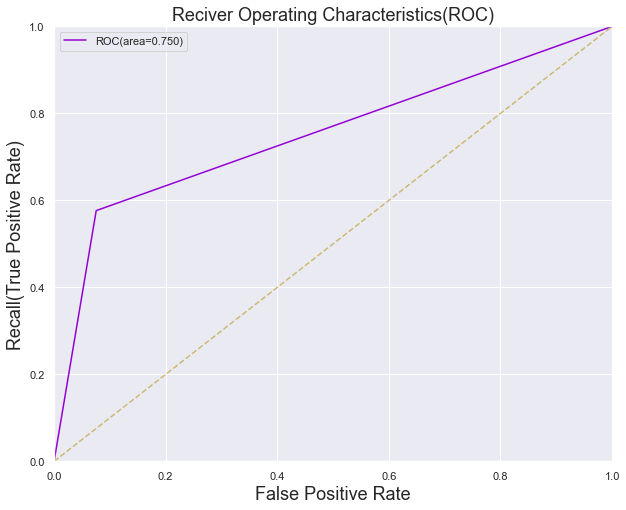

AUC: 0.7504747038000967


In [58]:
#ROC_AUC curve
roc_score = roc_auc_score(y_test,y_pred_LR)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_LR)
roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'darkviolet',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<h2> Random Forest</h2>

In [59]:
# Instantiate model with 50 decision trees
RF = RandomForestClassifier(n_estimators=50)
# Train the model on training data
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [60]:
# Use the forest's predict method on the test data
y_pred_RF = RF.predict(X_test)

In [61]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_RF)))

Accuracy Score: 0.843858776727996


In [62]:
#Cross validation score
cv_score = cross_val_score(RF,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8337457973869948


In [63]:
#Mean score of cross validation 
cv_score_RF = cross_val_score(RF, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_score_RF.mean())

Mean Score of CV:  0.7952749043904093


In [64]:
#classification report with precision, recall and f1-score
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4529
           1       0.71      0.63      0.67      1504

    accuracy                           0.84      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033



In [65]:
#Confusion matrix
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix_RF)

[[4141  388]
 [ 554  950]]


ROC score is: 0.7729894051573076


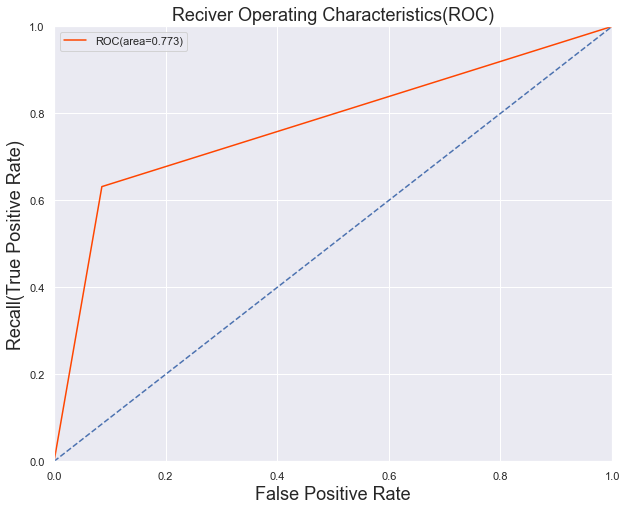

AUC: 0.7729894051573076


In [66]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_pred_RF)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_RF)
roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'orangered',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'b--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<h2>Decission Tree</h2>

In [67]:
#Decision tree classifier with max_depth of tree set to be 12 
DT = DecisionTreeClassifier(max_depth = 12)
# Train the model on training data
DT.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=12)

In [68]:
# Use the tree's predict method on the test data
y_pred_DT = DT.predict(X_test)

In [69]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_DT)))

Accuracy Score: 0.8453505718547986


In [70]:
#Cross validation score
cv_score = cross_val_score(DT,X_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8266162971389942


In [71]:
#Mean score of cross validation
cv_score_DT = cross_val_score(DT, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_score_DT.mean())

Mean Score of CV:  0.7995854690303708


In [72]:
#classification report with precision, recall and f1-score
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4529
           1       0.76      0.56      0.64      1504

    accuracy                           0.85      6033
   macro avg       0.81      0.75      0.77      6033
weighted avg       0.84      0.85      0.84      6033



In [73]:
#Confusion Matrix
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix_DT)

[[4264  265]
 [ 668  836]]


ROC score is: 0.748669625533794


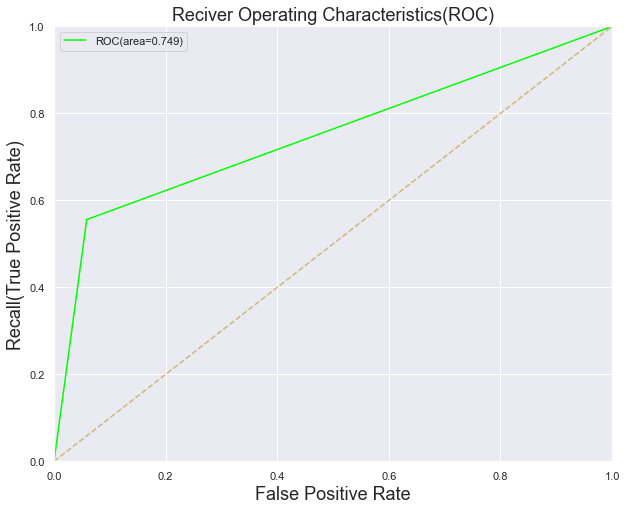

AUC: 0.748669625533794


In [74]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_pred_DT)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_DT)
roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'lime',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<h2>K-Nearest Neighbor or KNN</h2>

KNN is a supervised algorithm (which means that the training data is labeled)


In [75]:
#We choose n_neighbors = 5, so we will consider the 5 points with minimum distances from the new observation. 
KNN = KNeighborsClassifier(n_neighbors=3)  
# Train the model on training data
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
# Use the knn's predict method on the test data
y_pred_KNN = KNN.predict(X_test)

In [77]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_KNN)))

Accuracy Score: 0.8161776893751036


In [78]:
#classification report
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4529
           1       0.64      0.61      0.62      1504

    accuracy                           0.82      6033
   macro avg       0.75      0.75      0.75      6033
weighted avg       0.81      0.82      0.81      6033



#### Choosing optimum K value

In [79]:
##### This block of code will take some time to execute as it's plotting the error for K value 1 to 40


#created blank list name called error
error = []
#calculating the error for different values from 1 to 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

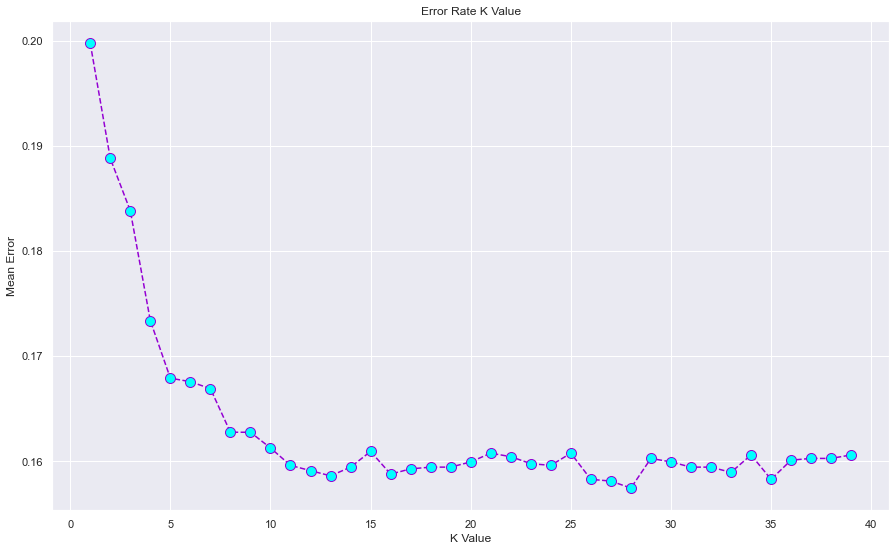

In [80]:
plt.figure(figsize=(15,9))  
plt.plot(range(1, 40), error, color='darkviolet', linestyle='dashed', marker='o', markerfacecolor='aqua', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

=> After ploting the error rate of each k values, we observed that optimum values with lowest error rate are 12, 19, and 26. So for further analysis we will set the k value to be 12.

In [81]:
#We choose n_neighbors = 12, so we will consider the 10 points with minimum distances from the new observation. 
KNN1 = KNeighborsClassifier(n_neighbors=12) 
# Train the model on training data
KNN1.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=12)

In [82]:
# Use the knn's predict method on the test data
y_pred_KNN1 = KNN1.predict(X_test)

In [83]:
#Accuracy score
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred_KNN1)))

Accuracy Score: 0.8408751864743909


In [84]:
#classification report
print(classification_report(y_test, y_pred_KNN1))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4529
           1       0.72      0.59      0.65      1504

    accuracy                           0.84      6033
   macro avg       0.80      0.76      0.77      6033
weighted avg       0.83      0.84      0.84      6033



ROC score is: 0.7574573346471675


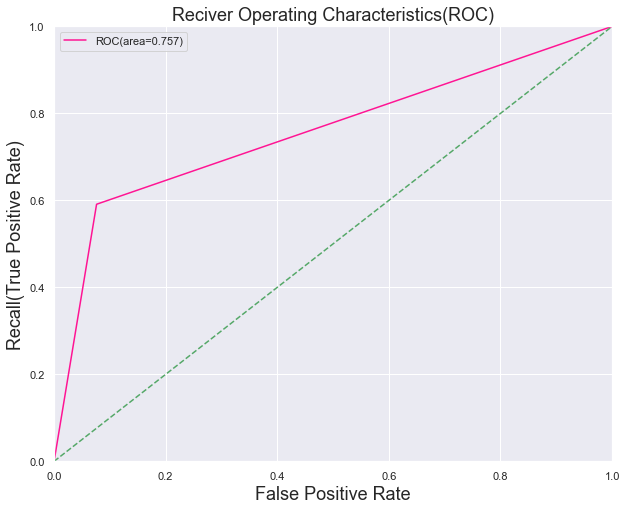

AUC: 0.7574573346471675


In [85]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test,y_pred_KNN1)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test,y_pred_KNN1)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'deeppink',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'g--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

# Model Comparison

In [86]:
comparison_tab = pd.DataFrame({"Model": ["Logitic Regression",
                                "Random Forest", 
                                "Decision Tress",
                                "KNN",
                                "KNN Classifier with optimum k value"],
                                "Accuracy Scores": ["0.86", "0.88", "0.86","0.84","0.87"],
                                "Cross Validation": ["0.85","0.86","0.82","0.00","0.00"],
                                "f1-score(with weighted average)": ["0.83","0.88","0.86","0.83","0.83"],
                                "ROC/AUC": ["0.57", "0.67", "0.72","0.00","0.55"]})

comparison_tab["Model"] = comparison_tab["Model"].astype("category")
comparison_tab["Accuracy Scores"] = comparison_tab["Accuracy Scores"].astype("float32")
comparison_tab["Cross Validation"] = comparison_tab["Cross Validation"].astype("float32")
comparison_tab["f1-score(with weighted average)"] = comparison_tab["f1-score(with weighted average)"].astype("float32")
comparison_tab["ROC/AUC"] = comparison_tab["ROC/AUC"].astype("float32")
pd.pivot_table(comparison_tab, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores,Cross Validation,ROC/AUC,f1-score(with weighted average)
Model,,,,
Random Forest,0.88,0.86,0.67,0.88
KNN Classifier with optimum k value,0.87,0.00,0.55,0.83
Decision Tress,0.86,0.82,0.72,0.86
Logitic Regression,0.86,0.85,0.57,0.83
KNN,0.84,0.00,0.00,0.83


=> From above table we can observe that almost all the model are preforming with good by accuracy, but the best model is Random Forest which we will use for predicting the income.
 

# Model Testing

<h2>Testing sample data using random forest model</h2>

- I have created an excel file which has 12 columns with dummy input and number of rows are 30.

In [87]:
# fetching the dummy data from the google sheets to test model
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQMyTgmNriCy2LFHplwWnz3b8bKRKEcS8-AV3jFw_x4uRbTl3Gz02eTw5XAoCwfUXx21NIar_eLUIDh/pub?gid=1071256624&single=true&output=csv'
df_dummy_excel = pd.read_csv(data_path)
df_dummy_excel.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States


In [88]:
df_dummy_excel.shape

(23, 14)

In [89]:
Final_Results = df_dummy_excel.copy()

<h2> One hot encoding for the dummy input data to predict the income</h2>

In [90]:
#One-hot encode the 'log_normaliz_transform' data to get 
#   rid of categorical columns
df_dummy_excel = pd.get_dummies(log_normaliz_transform)

# Get number of features after one-hot encoding
encoded_df = list(df_dummy_excel.columns)
print("{} total features after one-hot encoding.".format(len(encoded_df)))

print (encoded_df)

103 total features after one-hot encoding.
['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing',

<h2>Using the best model to predict income</h2>

In [91]:
#Selected all columns except the dependent varaible('income')
X_dummy = df_dummy_excel
y_dummy_pred = RF.predict(X_dummy)

- To prediction of income here, I have used a model with best accuracy(88%) name Random Forest 

In [92]:
# Showing the data along with the predicted value of income
prediction_dummy_df = pd.DataFrame(RF.predict(X_dummy), columns = {'Prediction'}).set_index([pd.Index(X_dummy.index)])
probability_dummy_df = pd.DataFrame(RF.predict_proba(X_dummy)).set_index([pd.Index(X_dummy.index)])
all_dummy_df = X_dummy.join(prediction_dummy_df).join(probability_dummy_df)

- Prepaaring dataframe to view data for provided input

In [93]:
Predicted_result = Final_Results.join(prediction_dummy_df).join(probability_dummy_df)

In [94]:
Predicted_result.dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Prediction,0,1
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0.0,0.80,0.20
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0.0,0.90,0.10
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0.0,0.96,0.04
5,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,0.0,0.90,0.10
6,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0.0,0.68,0.32
7,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1.0,0.20,0.80
8,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,0.0,0.78,0.22
10,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,0.0,0.54,0.46
11,46,Private,45363,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,1.0,0.00,1.00
12,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,1.0,0.22,0.78


<p>=> By observing above values we can interpret that for given inputs the income depends more on age, education_number, cpital gain, capital loss and hours per week.</p>
<p>=> Let's observe more in detail, with doctrate degree and age around 40 to 45 and relationship as unmarried model predicts that 84% chances, person will be having salary above 50K even if the hours per week is around 35.
</p>

# Conclusion: 

- In this assignment, I used Logistic Regression, K-Nearest Neighbours with optimum K values, Decision Tree, and Random Forest. With the accuracy score, cross-validation, classification report and ROC/AUC score for each model.

- To speed up a machine learning algorithm, I have used data normalization - StandardScaller() to scale the data which helps to improve the model performance.

- Even though the salary of a person is a subjective matter, prediction can still help tremendously to find weather person is earning <=50K or >50k. We were able to predict the income using the best model (i.e. random forest), with accuracy score 88%.

- This project allowed us to not only have accurate predictions about the annual earning for each individual but also to understand each model’s strengths and weaknesses when it comes to classification. 

<h2>References:</h2>

<p>1] <b>Scale, Standardize, or Normalize with Scikit-Learn</b></p>
<p>https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02</p>
<p>2] <b>The python graph gallery</b></p>
<p>https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/</p>
<p>3] <b>Styling plots with Seaborn</b></p>
<p>http://jose-coto.com/styling-with-seaborn</p>
<p>4] <b>One-Hot Encoding in Python with Pandas and Scikit-Learn</b></p>
<p>https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/</p>
